# Logistic Regression (MNIST dataset)

## Import Module

In [1]:
%matplotlib inline
from keras.datasets import mnist
from keras.utils import to_categorical
import math
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load Dataset

In [2]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [3]:
# X_train : Train dataset(Image feature data) / X_test : Test dataset(Image feature data)
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [4]:
# y_train: Train dataset(label data) / y_test : Test dataset(label data)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


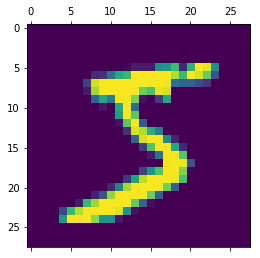

In [5]:
# Show Image of X_train[0]
plt.matshow(X_train[0].reshape(28, 28))

In [6]:
# Show result label of X_train[0] (=5)
y_train[0].argmax()

5

## Sigmoid Function

In [7]:
# For Calculating Cost (calculate value range from 0 to 1)
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.000123394575986
0.5
0.999876605424


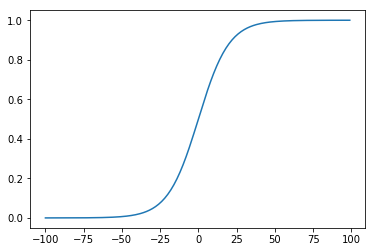

In [8]:
x = range(-100, 100)
y = [sigmoid(i/10) for i in x]
plt.plot(x, y)

## Gradient Descent

In [10]:
learning_rate = 1
num_epoch = 1000

In [11]:
# Parameter
w = np.random.uniform(low=-1.0, high=1.0, size=(28*28, 10))
b = np.random.uniform(low=-1.0, high=1.0, size=10)

In [12]:
for epoch in range(num_epoch):
    # Predict y (=number 0~9)
    y_predict = X_train.dot(w) + b
    y_predict = sigmoid(y_predict)
    
    # Calculating Error
    error = (y_predict.argmax(axis=1) != y_train.argmax(axis=1)).mean()
    
    # Print Error
    if epoch % 10 == 0:
        print("{0:4} error = {1:.5f}".format(epoch, error))
    
    # Gradient Descent for Multiple Variables
    w = w - learning_rate * X_train.T.dot(y_predict - y_train)
    b = b - learning_rate * (y_predict - y_train).mean(axis=0)

C:\Users\Jinhe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


   0 error = 0.90445
  10 error = 0.30808
  20 error = 0.21853
  30 error = 0.24987
  40 error = 0.23550
  50 error = 0.29340
  60 error = 0.25028
  70 error = 0.16492
  80 error = 0.23932
  90 error = 0.17283
 100 error = 0.15498
 110 error = 0.16617
 120 error = 0.14422
 130 error = 0.23307
 140 error = 0.19653
 150 error = 0.23132
 160 error = 0.13538
 170 error = 0.19332
 180 error = 0.20510


KeyboardInterrupt: 

## Train

In [13]:
# Predict using calculated parameter
y_predict = X_train.dot(w) + b
y_predict = sigmoid(y_predict)

C:\Users\Jinhe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Make Result Dataframe
actual = y_train.argmax(axis=1)
predict = y_predict.argmax(axis=1)

pd.DataFrame({'actual': actual, 'predict': predict}).head(10)

,actual,predict
0,5,5
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


## Test

In [15]:
# Predict using calculated parameter
y_predict = X_test.dot(w) + b
y_predict = sigmoid(y_predict)

C:\Users\Jinhe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Make Result Dataframe
actual = y_test.argmax(axis=1)
predict = y_predict.argmax(axis=1)

result = pd.DataFrame({'actual': actual, 'predict': predict})
result.head(10)

,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


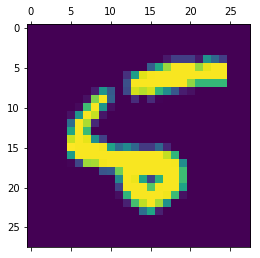

In [17]:
# Print Error
plt.matshow(X_test[8].reshape(28, 28))

In [18]:
# Calculating accuracy
accuracy = []

for i in range(10):
    chunk = result[result["actual"] == i]
    accuracy.append((chunk["actual"] == chunk["predict"]).mean())

In [19]:
result = pd.DataFrame({'accuracy' : accuracy})
result

,accuracy
0,0.989796
1,0.968282
2,0.877907
3,0.882178
4,0.823829
5,0.701794
6,0.871608
7,0.879377
8,0.840862
9,0.668979


## Score

### Make request to azure function for score

In [20]:
_url = "https://jinheon-azureml-score.azurewebsites.net/api/Logistic-Regression-Score?code=gG5CmUzXsaBY2bCStVdAvltwagL4e7q15zTipWJCDW0xsgMlVUamUg=="

In [21]:
json = {
    "name": "Jinheon",
    "score": result['accuracy'].mean()
}

In [24]:
req = requests.request('POST', _url, json = json)

In [25]:
print(req.json())

Congratulation Jinheon, Your score is 0.850461225167902
